## **DATA VISUALIZATION**

Chargement du fichier...
Colonnes trouvées : ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
Données nettoyées avec succès !
               Price       Open       High        Low  Vol. Change %  \
Date                                                                   
2020-01-17  12486.85  12,391.34  12,486.85  12,373.52   NaN    0.77%   
2020-01-20  12487.31  12,486.85  12,493.26  12,461.69   NaN    0.00%   
2020-01-21  12521.23  12,487.31  12,522.03  12,474.66   NaN    0.27%   
2020-01-22  12633.57  12,521.23  12,634.08  12,516.88   NaN    0.90%   
2020-01-23  12577.83  12,633.57  12,655.84  12,570.51   NaN   -0.44%   

            Log_Return  
Date                    
2020-01-17         NaN  
2020-01-20    0.000037  
2020-01-21    0.002713  
2020-01-22    0.008932  
2020-01-23   -0.004422  


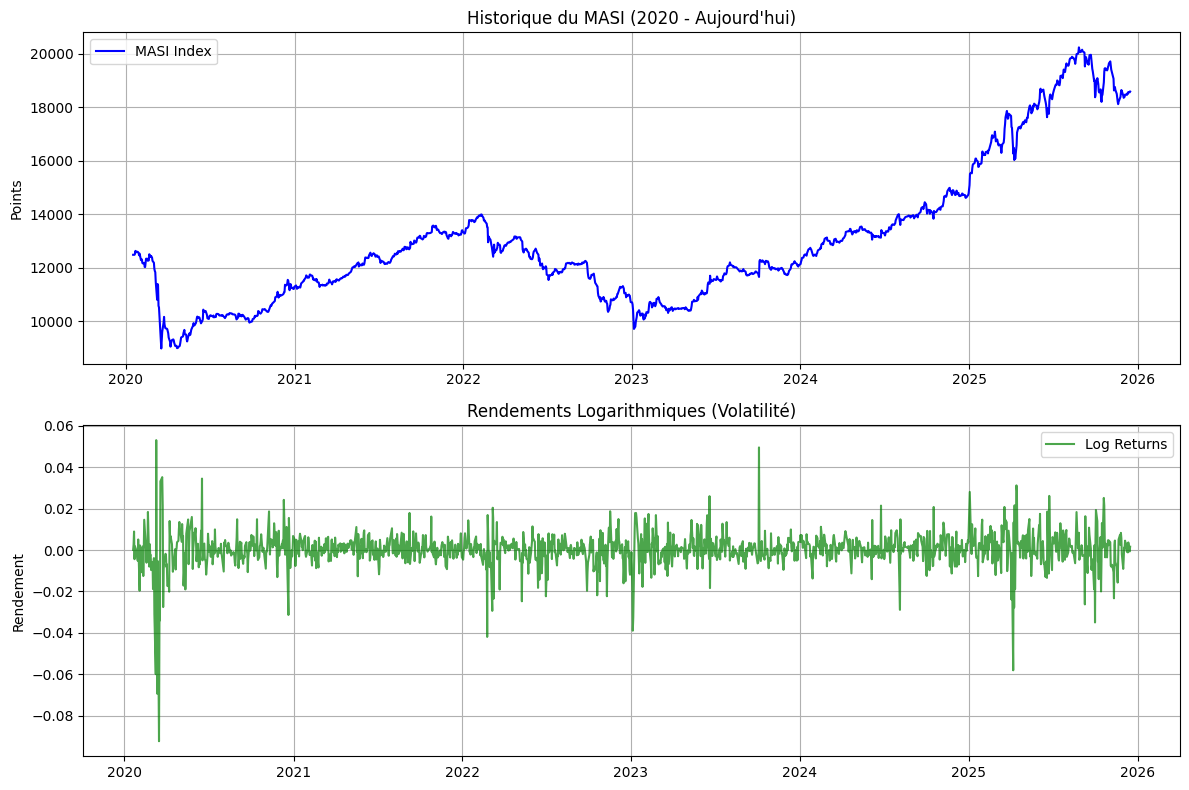

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Mettez ici le nom EXACT de votre fichier téléchargé
nom_fichier = "Moroccan All Shares Historical Data.csv" 

try:
    # Lecture du fichier
    print("Chargement du fichier...")
    df = pd.read_csv(nom_fichier)

    # Affichage des premières lignes pour vérifier les noms de colonnes
    print("Colonnes trouvées :", df.columns.tolist())
    
    # 2. NETTOYAGE DES DONNEES (Étape cruciale en Data Science)
    
    # a) Gestion des dates
    # Investing.com donne souvent les dates format texte. On convertit.
    df['Date'] = pd.to_datetime(df['Date']) 
    df = df.sort_values('Date') # On trie du plus ancien au plus récent
    df.set_index('Date', inplace=True) # On met la date en index

    # b) Gestion du Prix (souvent appelé "Dernier" ou "Price")
    col_prix = 'Dernier' if 'Dernier' in df.columns else 'Price'
    
    # Si le prix est lu comme du texte (ex: "13.000,50"), il faut le convertir
    if df[col_prix].dtype == object:
        # On enlève les séparateurs de milliers (souvent ',' ou '.') et on force en float
        df[col_prix] = df[col_prix].astype(str).str.replace(',', '').astype(float)

    # 3. CALCUL DES RENDEMENTS (Log Returns)
    # Comme dans votre premier code
    df['Log_Return'] = np.log(df[col_prix] / df[col_prix].shift(1))

    print("Données nettoyées avec succès !")
    print(df.head())

    # 4. VISUALISATION
    plt.figure(figsize=(12, 8))

    # Graphe 1 : Prix
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df[col_prix], color='blue', label='MASI Index')
    plt.title("Historique du MASI (2020 - Aujourd'hui)")
    plt.ylabel("Points")
    plt.grid(True)
    plt.legend()

    # Graphe 2 : Rendements Logarithmiques (Volatilité)
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['Log_Return'], color='green', alpha=0.7, label='Log Returns')
    plt.title("Rendements Logarithmiques (Volatilité)")
    plt.ylabel("Rendement")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"ERREUR : Le fichier '{nom_fichier}' est introuvable. Vérifiez le nom.")
except Exception as e:
    print(f"Une erreur est survenue : {e}")

## **STAT DESCRIPTIVE**

In [3]:
from scipy.stats import skew, kurtosis # Nécessaire pour l'analyse de distribution

# ==============================================================================
#                      ANALYSE STATISTIQUE DESCRIPTIVE
# ==============================================================================

print("\n" + "█"*50)
print("             RAPPORT STATISTIQUE DU MASI")
print("█"*50 + "\n")

# 1. LES BASIQUES (Mean, Std, Min, Max)
desc = df['Log_Return'].describe()
print("--- 1. Résumé Global (Données journalières) ---")
print(f"Nombre d'observations : {desc['count']:.0f} jours")
print(f"Moyenne journalière   : {desc['mean']:.5f}")
print(f"Écart-type (Risque)   : {desc['std']:.5f}")
print(f"Minimum historique    : {desc['min']:.5f}")
print(f"Maximum historique    : {desc['max']:.5f}")

# 2. ANNUALISATION (Pour parler 'Finance')
# On multiplie par 252 (jours de bourse) ou racine de 252 pour la volatilité
mean_ann = df['Log_Return'].mean() * 252
vol_ann = df['Log_Return'].std() * (252**0.5)

print("\n--- 2. Indicateurs Annualisés (Vision Macro) ---")
print(f"Rendement Espéré (Annuel) : {mean_ann*100:.2f} %")
print(f"Volatilité (Risque Annuel): {vol_ann*100:.2f} %")

# 3. FORME DE LA DISTRIBUTION (Analyse Data Science)
# Skewness : Symétrie. Si négatif, les krachs sont plus fréquents que les rallyes.
# Kurtosis : Épaisseur des queues. Si > 3, risque d'événements extrêmes (Black Swans).
sk = skew(df['Log_Return'])
ku = kurtosis(df['Log_Return'])

print("\n--- 3. Analyse de la Distribution (Risque Extrême) ---")
print(f"Skewness (Asymétrie) : {sk:.4f}")
print(f"   -> Interprétation : {'Tendance aux chutes brutales (Négatif)' if sk < 0 else 'Tendance aux hausses brutales'}")

print(f"Kurtosis (Aplatissement) : {ku:.4f}")
print(f"   -> Interprétation : {'Distribution Normale (Calme)' if ku < 3 else 'RISQUE ÉLEVÉ (Queues épaisses / Chocs fréquents)'}")

print("\n" + "█"*50)


██████████████████████████████████████████████████
             RAPPORT STATISTIQUE DU MASI
██████████████████████████████████████████████████

--- 1. Résumé Global (Données journalières) ---
Nombre d'observations : 1472 jours
Moyenne journalière   : 0.00027
Écart-type (Risque)   : 0.00852
Minimum historique    : -0.09232
Maximum historique    : 0.05305

--- 2. Indicateurs Annualisés (Vision Macro) ---
Rendement Espéré (Annuel) : 6.81 %
Volatilité (Risque Annuel): 13.53 %

--- 3. Analyse de la Distribution (Risque Extrême) ---
Skewness (Asymétrie) : nan
   -> Interprétation : Tendance aux hausses brutales
Kurtosis (Aplatissement) : nan
   -> Interprétation : RISQUE ÉLEVÉ (Queues épaisses / Chocs fréquents)

██████████████████████████████████████████████████


## **Stationnarité et Autocorrélation**


██████████████████████████████████████████████████
             TESTS DE STATIONNARITÉ & MÉMOIRE
██████████████████████████████████████████████████

--- Résultat du test ADF pour : Rendements du MASI ---
Statistique ADF : -10.7131
p-value         : 3.2939e-19
✅ CONCLUSION : La série est STATIONNAIRE (p-value < 0.05).
   -> Vous pouvez utiliser des modèles comme ARIMA/GARCH.
--------------------------------------------------

Génération des graphiques d'autocorrélation...


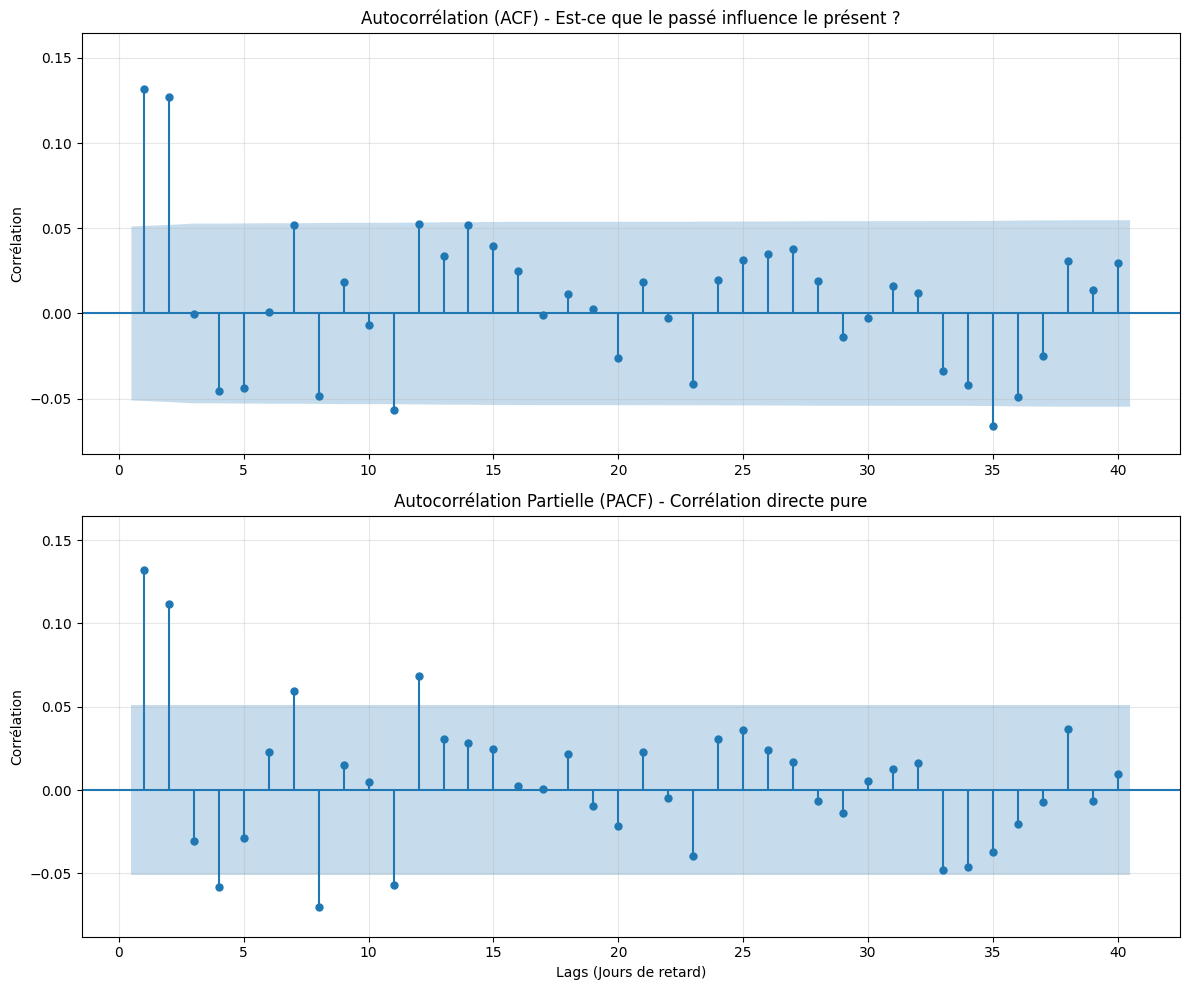

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ==============================================================================
#                      DIAGNOSTICS ÉCONOMÉTRIQUES
# ==============================================================================

print("\n" + "█"*50)
print("             TESTS DE STATIONNARITÉ & MÉMOIRE")
print("█"*50 + "\n")

# 1. NETTOYAGE CRITIQUE (Pour éviter les graphes vides)
# On enlève les valeurs infinies ou manquantes (NaN) qui font planter les graphiques
clean_returns = df['Log_Return'].replace([np.inf, -np.inf], np.nan).dropna()

# --- PARTIE 1 : TEST ADF (Augmented Dickey-Fuller) ---
def adf_test(series, name):
    print(f"--- Résultat du test ADF pour : {name} ---")
    result = adfuller(series)
    print(f'Statistique ADF : {result[0]:.4f}')
    print(f'p-value         : {result[1]:.4e}')
    
    # Interprétation automatique
    if result[1] < 0.05:
        print("✅ CONCLUSION : La série est STATIONNAIRE (p-value < 0.05).")
        print("   -> Vous pouvez utiliser des modèles comme ARIMA/GARCH.")
    else:
        print("❌ CONCLUSION : La série n'est PAS stationnaire.")
        print("   -> Il faut différencier la série avant de modéliser.")
    print("-" * 50)

# Lancement du test
adf_test(clean_returns, "Rendements du MASI")


# --- PARTIE 2 : GRAPHIQUES D'AUTOCORRÉLATION (ACF / PACF) ---
print("\nGénération des graphiques d'autocorrélation...")

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# 1. ACF (Autocorrelation Function)
# zero=False enlève la barre à 0 (qui vaut toujours 1) pour plus de clarté
plot_acf(clean_returns, lags=40, ax=ax[0], alpha=0.05, zero=False, auto_ylims=True)
ax[0].set_title("Autocorrélation (ACF) - Est-ce que le passé influence le présent ?")
ax[0].set_ylabel("Corrélation")
ax[0].grid(True, alpha=0.3)

# 2. PACF (Partial Autocorrelation Function)
plot_pacf(clean_returns, lags=40, ax=ax[1], alpha=0.05, zero=False, auto_ylims=True)
ax[1].set_title("Autocorrélation Partielle (PACF) - Corrélation directe pure")
ax[1].set_ylabel("Corrélation")
ax[1].set_xlabel("Lags (Jours de retard)")
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **MODELISATION ARIMA**


██████████████████████████████████████████████████
             MODÉLISATION ARIMA (2,0,2)
██████████████████████████████████████████████████

Entraînement du modèle en cours... (Cela peut prendre quelques secondes)


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                 1472
Model:                 ARIMA(2, 0, 2)   Log Likelihood                4953.202
Date:                Wed, 17 Dec 2025   AIC                          -9894.405
Time:                        01:13:18   BIC                          -9862.639
Sample:                             0   HQIC                         -9882.560
                               - 1472                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.905      0.365      -0.000       0.001
ar.L1          0.4721      0.120      3.929      0.000       0.237       0.708
ar.L2         -0.3794      0.089     -4.245      0.0

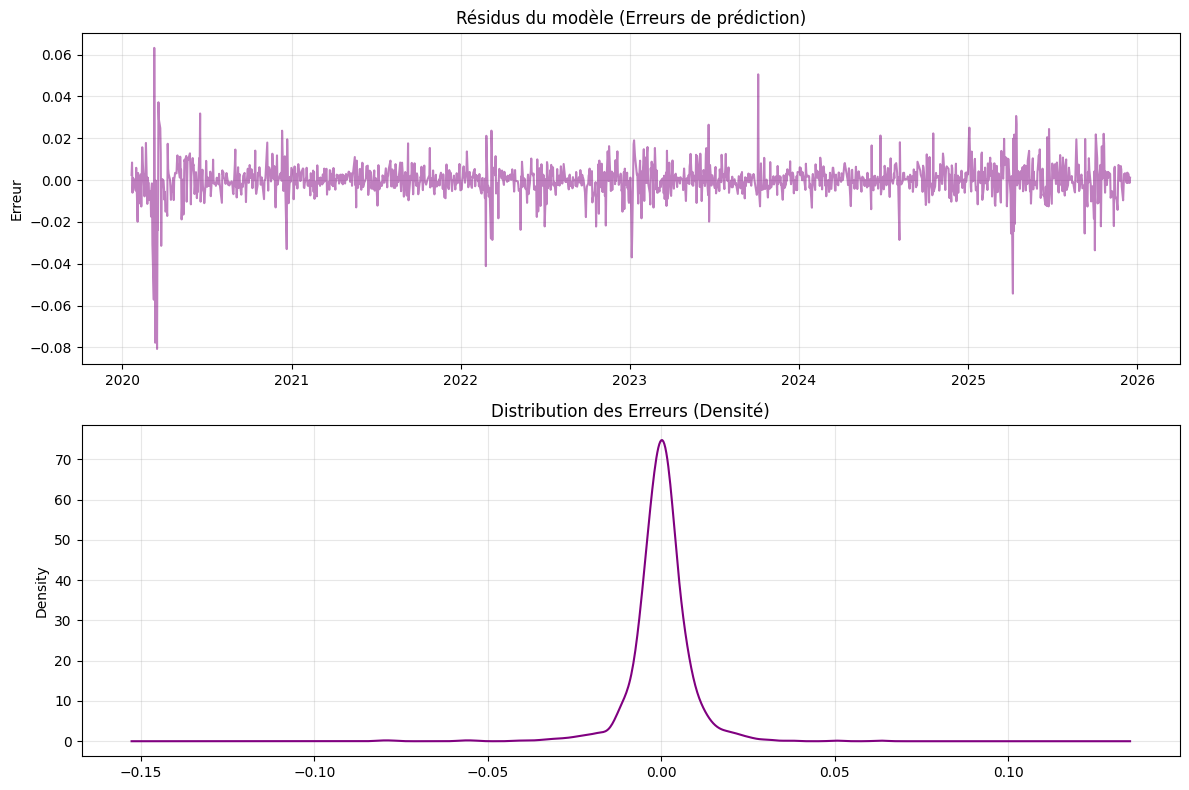

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# ==============================================================================
#                      MODÉLISATION ARIMA (Prédiction)
# ==============================================================================

print("\n" + "█"*50)
print("             MODÉLISATION ARIMA (2,0,2)")
print("█"*50 + "\n")

# 1. Configuration du modèle
# On choisit order=(2, 0, 2) car on a vu des pics aux Lags 1 et 2 sur tes graphes
# p=2 (AutoRégressif), d=0 (Déjà stationnaire), q=2 (Moyenne Mobile)
print("Entraînement du modèle en cours... (Cela peut prendre quelques secondes)")
model = ARIMA(clean_returns, order=(2, 0, 2))
model_fit = model.fit()

# 2. Résumé statistique du modèle
print(model_fit.summary())

# 3. Test de prédiction sur les données existantes
print("\nComparaison Réalité vs Modèle :")
residuals = model_fit.resid
print(f"Moyenne des erreurs (Doit être proche de 0) : {residuals.mean():.6f}")

# 4. Visualisation des Résidus (Ce que le modèle n'a pas réussi à expliquer)
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Erreurs dans le temps
ax[0].plot(residuals[1:], color='purple', alpha=0.5)
ax[0].set_title("Résidus du modèle (Erreurs de prédiction)", fontsize=12)
ax[0].set_ylabel("Erreur")
ax[0].grid(True, alpha=0.3)

# Distribution des erreurs (Doit ressembler à une cloche)
residuals[1:].plot(kind='kde', ax=ax[1], color='purple')
ax[1].set_title("Distribution des Erreurs (Densité)", fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **FORECASTING**


██████████████████████████████████████████████████
             PRÉDICTION DES 5 PROCHAINS JOURS
██████████████████████████████████████████████████

Voici les prévisions du modèle pour la semaine prochaine :
   Jour  Rendement Prévu (Log)  Borne Basse (Pessimiste)  \
0     1               0.000224                 -0.016163   
1     2               0.000280                 -0.016221   
2     3               0.000291                 -0.016360   
3     4               0.000275                 -0.016379   
4     5               0.000263                 -0.016405   

   Borne Haute (Optimiste)  
0                 0.016610  
1                 0.016781  
2                 0.016942  
3                 0.016929  
4                 0.016931  


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


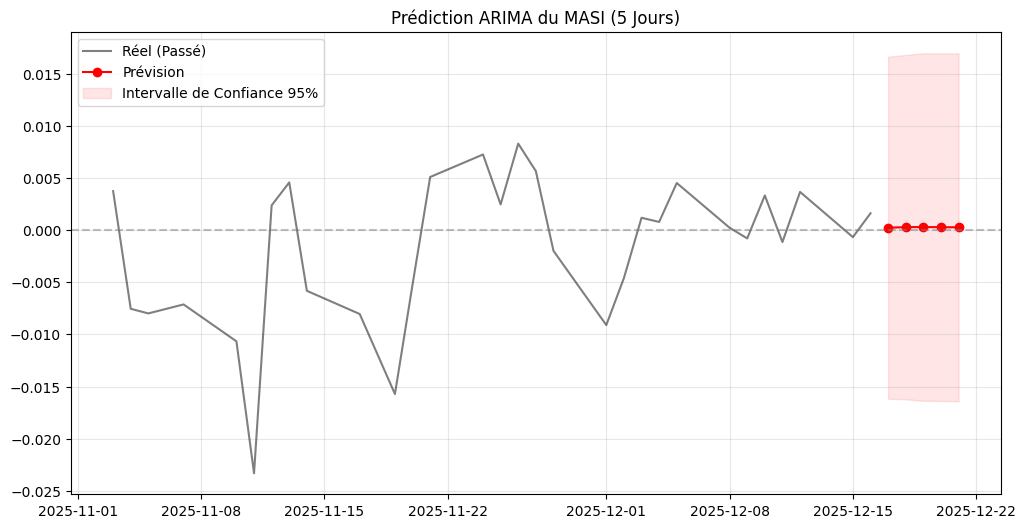


--- INTERPRÉTATION ---
📈 Tendance prédite : HAUSSIÈRE (Le modèle prévoit une remontée globale)


In [8]:
# ==============================================================================
#                      PRÉDICTION (FORECASTING)
# ==============================================================================

print("\n" + "█"*50)
print("             PRÉDICTION DES 5 PROCHAINS JOURS")
print("█"*50 + "\n")

# 1. Générer la prévision
# On demande au modèle de prédire 5 pas en avant (steps=5)
forecast_result = model_fit.get_forecast(steps=5)

# 2. Récupérer les données
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05) # Intervalle de confiance à 95%

# 3. Créer un petit tableau propre
forecast_df = pd.DataFrame({
    'Jour': range(1, 6),
    'Rendement Prévu (Log)': forecast_values.values,
    'Borne Basse (Pessimiste)': conf_int.iloc[:, 0].values,
    'Borne Haute (Optimiste)': conf_int.iloc[:, 1].values
})

print("Voici les prévisions du modèle pour la semaine prochaine :")
print(forecast_df)

# 4. Visualisation (Zoom sur la fin + Futur)
plt.figure(figsize=(12, 6))

# On affiche les 30 derniers jours réels
last_days = df.iloc[-30:]
plt.plot(last_days.index, last_days['Log_Return'], label='Réel (Passé)', color='black', alpha=0.5)

# On crée des fausses dates pour le futur (pour l'affichage)
last_date = last_days.index[-1]
future_dates = pd.date_range(start=last_date, periods=6)[1:] # 5 jours après

# On trace la prévision
plt.plot(future_dates, forecast_values, label='Prévision', color='red', marker='o')

# Zone d'incertitude (Intervalle de confiance)
plt.fill_between(future_dates, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='red', alpha=0.1, label='Intervalle de Confiance 95%')

plt.title("Prédiction ARIMA du MASI (5 Jours)")
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Interprétation directionnelle
print("\n--- INTERPRÉTATION ---")
somme_prevue = forecast_values.sum()
if somme_prevue > 0:
    print("📈 Tendance prédite : HAUSSIÈRE (Le modèle prévoit une remontée globale)")
else:
    print("📉 Tendance prédite : BAISSIÈRE (Le modèle prévoit une correction)")